## IAPS(International Affective Picture Syste)
- Florida 대학 정서 연구소의 Lang교수가 표준화한 국제 정서그림 체계
- 956장의 컬러 사진으로 구성
- 지난 십여 년간 미국인을 대상으로 반복적으로 평가되어 왔으며, 쾌(Pleasure), 각성(Arousal), 지배(Dominance)의 3개의 차원으로 구분하여 평가 결과가 제시  
  
- 본 연구에서는 Varience(Pleasure), Arousal의 2개 차원만으로 사진을 추출하여 실험에 활용할 예정
- 저작권

In [1]:
import os
import pandas as pd
import seaborn as sns

from plotnine import *
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

In [2]:
ratings = pd.read_excel('ratings.xlsx')

In [3]:
ratings

,desc,type,IAPS,valmn,valsd,aromn,arosd,dom1mn,dom1sd,dom2mn,dom2sd,set\
0,Snake,animal,1019.0,3.95,1.96,5.77,1.83,4.23,2.08,.,.,12\
1,Snake,animal,1022.0,4.26,2.04,6.02,1.97,3.9,2.21,.,.,12\
2,Snake,animal,1026.0,4.09,1.91,5.61,2.23,.,.,4.43,2.39,16\
3,Snake,animal,1030.0,4.30,2.35,5.46,2.43,4.56,2.43,.,.,1\
4,Snake,animal,1033.0,3.87,1.94,6.13,2.15,3.73,2.16,.,.,18\
...,...,...,...,...,...,...,...,...,...,...,...,...
1189,Flood,human,9926.0,3.85,1.59,4.83,1.95,.,.,4.37,2,16\
1190,Flood,human,9927.0,2.71,1.56,5.29,1.91,3.6,2.08,.,.,20\
1191,ShipWave,object,9930.0,3.12,1.53,5.71,1.88,2.97,1.81,.,.,17\
1192,Explosion,object,9940.0,1.62,1.20,7.15,2.24,2.45,2.22,.,.,20\


In [4]:
ratings.describe()

,IAPS,valmn,valsd,aromn,arosd
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,5320.996147,5.030142,1.584707,4.821734,2.158920
std,2705.552255,1.776872,0.317222,1.155464,0.225231
min,1019.000000,1.310000,0.600000,1.720000,1.260000
25%,2552.500000,3.552500,1.380000,3.970000,2.000000
50%,5430.000000,5.220000,1.570000,4.860000,2.150000
75%,7491.750000,6.530000,1.760000,5.697500,2.300000
max,9941.000000,8.340000,2.970000,7.350000,2.890000


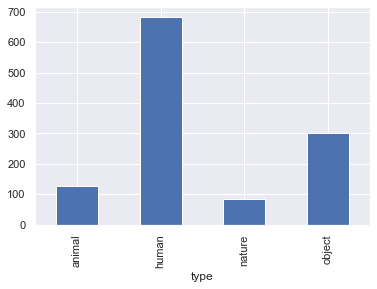

In [5]:
# 카테고리 별 사진개수 카운트
ratings.pivot_table(index=['type'],aggfunc='size').plot(kind='bar')

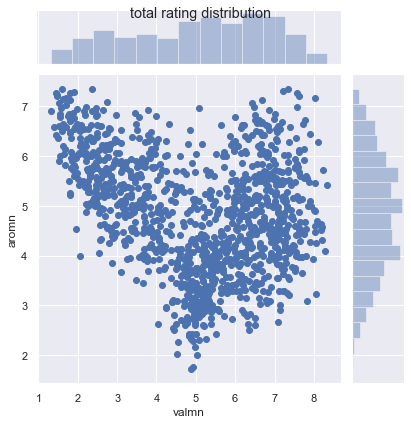

In [6]:
# 전체 사진 rating 분포
sns.jointplot(x="valmn", y="aromn", data=ratings)
plt.suptitle("total rating distribution")
plt.show()

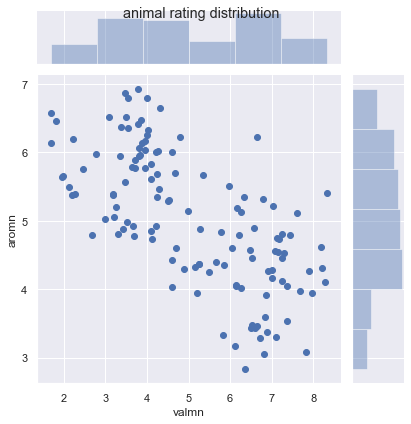

In [7]:
# 동물 사진 rating 분포
sns.jointplot(x="valmn", y="aromn", data=ratings[ratings['type']=='animal'])
plt.suptitle("animal rating distribution")
plt.show()

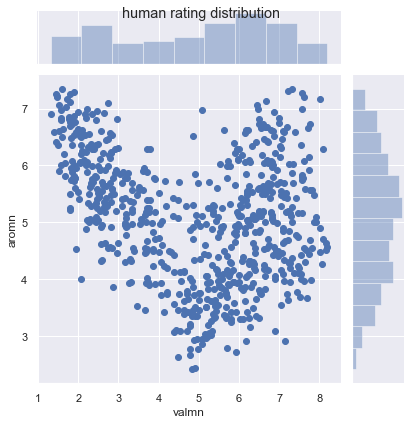

In [8]:
# 사람 사진 rating 분포
sns.jointplot(x="valmn", y="aromn", data=ratings[ratings['type']=='human'])
plt.suptitle("human rating distribution")
plt.show()

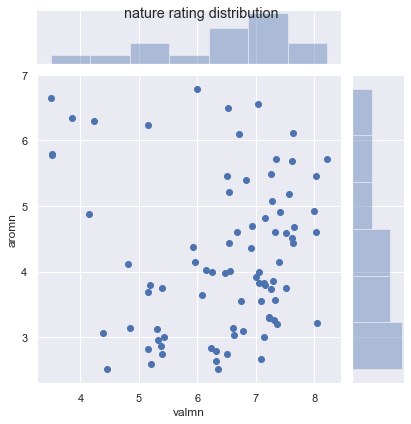

In [9]:
# 자연 사진 rating 분포
sns.jointplot(x="valmn", y="aromn", data=ratings[ratings['type']=='nature'])
plt.suptitle("nature rating distribution")
plt.show()

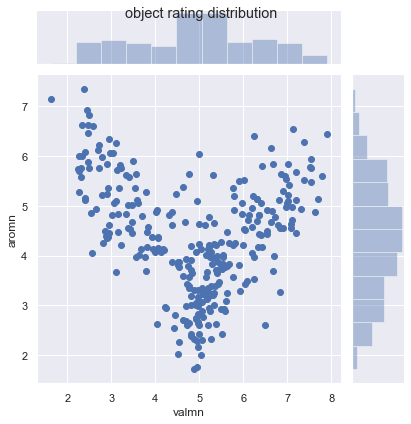

In [10]:
# 사물 사진 rating 분포
sns.jointplot(x="valmn", y="aromn", data=ratings[ratings['type']=='object'])
plt.suptitle("object rating distribution")
plt.show()

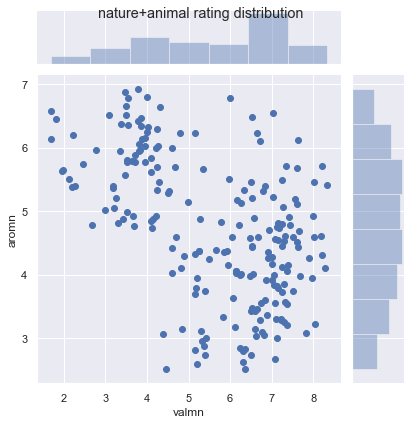

In [11]:
# 자연+동물 사진 rating 분포
sns.jointplot(x="valmn", y="aromn", data=ratings[(ratings['type']=='nature') | (ratings['type']=='animal')])
plt.suptitle("nature+animal rating distribution")
plt.show()

### 그래프 그리기

In [12]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
os.chdir('C:\\Users\\user\\OneDrive - konkuk.ac.kr\\대학수업\\2021년 2학기\\IAPS 2008 1-20\\IAPS 1-20 Images')

In [13]:
# 사진명 편집
def astype_jpg(num):
    s = str(num)
    if s[-1] == '0':
        s = str(int(num))     
    return s +'.jpg'

# 지정한 범위의 사진들만 골라내는 함수
def select_photo(val_min, val_max, aro_min, aro_max, df=ratings):
    temp_df = df[df['type']=='human']
    temp_df = temp_df[['IAPS','valmn','aromn']]
    temp_df = temp_df[(temp_df['valmn']>=val_min) & (temp_df['valmn']<=val_max)]
    temp_df = temp_df[(temp_df['aromn']>=aro_min) & (temp_df['aromn']<=aro_max)]
    temp_df['file'] = temp_df['IAPS'].apply(lambda x: astype_jpg(x))
    return temp_df

# 점 대신 해당 사진 그리기 위한 함수
def getImage(path, zoom =.1):
    return OffsetImage(plt.imread(path, format="jpg"), zoom=zoom)

def photoPlot(photo_li, x_li, y_li, x_lim=[1,10], y_lim=[1,10], plt_size = [5,5], zoom =.1):
    plt.rcParams["figure.figsize"] = plt_size
    plt.rcParams["figure.autolayout"] = True
    
    
    fig, ax = plt.subplots()
    for x0, y0, path in zip(x_li, y_li, photo_li):
        ab = AnnotationBbox(getImage(path, zoom), (x0, y0), frameon=False)
        ax.add_artist(ab)
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.show()

### 각 구역 별 사진

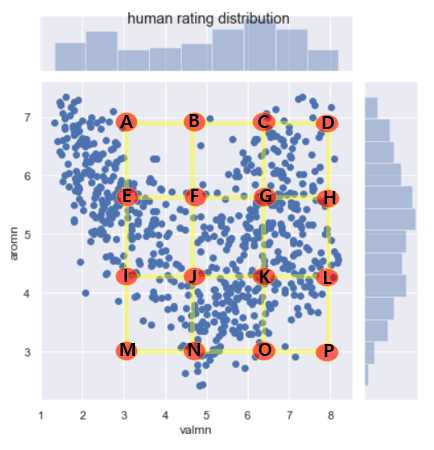

[2.5, 3.5], [6.5, 7.5] | [4.2, 5.2], [6.5, 7.5] | [5.8, 6.8], [6.5, 7.5] | [7.5, 8.5], [6.5, 7.5]  
[2.5, 3.5], [5.2, 6.2] | [4.2, 5.2], [5.2, 6.2] | [5.8, 6.8], [5.2, 6.2] | [7.5, 8.5], [5.2, 6.2]  
[2.5, 3.5], [3.8, 4.8] | [4.2, 5.2], [3.8, 4.8] | [5.8, 6.8], [3.8, 4.8] | [7.5, 8.5], [3.8, 4.8]  
[2.5, 3.5], [2.5, 3.5] | [4.2, 5.2], [2.5, 3.5] | [5.8, 6.8], [2.5, 3.5] | [7.5, 8.5], [2.5, 3.5]  
  
  

A

In [14]:
x_lim=[2.5,3.5]
y_lim=[6.5,7.5]
temp_df = select_photo(x_lim[0],x_lim[1],y_lim[0],y_lim[1])
temp_df

,IAPS,valmn,aromn,file
414,3212.0,2.79,6.57,3212.jpg
415,3213.0,2.96,6.82,3213.jpg
691,6250.0,2.83,6.54,6250.jpg
692,6250.1,2.63,6.92,6250.1.jpg
711,6550.0,2.73,7.09,6550.jpg
1073,9250.0,2.57,6.60,9250.jpg


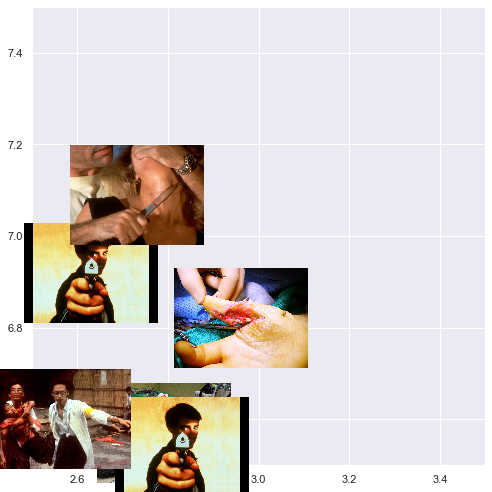

In [15]:
photo_li = temp_df['file'].to_list()
x_li = temp_df['valmn'].to_list()
y_li = temp_df['aromn'].to_list()
ratio = (y_lim[1]-y_lim[0])/(x_lim[1]-x_lim[0])

size = 7
photoPlot(photo_li,x_li,y_li, x_lim, y_lim, plt_size=[size,size*ratio], zoom=.13)

B

In [16]:
x_lim=[4.2,5.2]
y_lim=[6.5,7.5]
temp_df = select_photo(x_lim[0],x_lim[1],y_lim[0],y_lim[1])
temp_df

,IAPS,valmn,aromn,file
963,8160.0,5.07,6.97,8160.jpg
1012,8475.0,4.85,6.52,8475.jpg


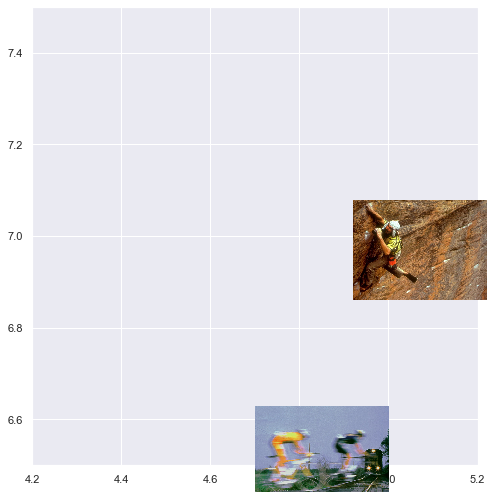

In [17]:
photo_li = temp_df['file'].to_list()
x_li = temp_df['valmn'].to_list()
y_li = temp_df['aromn'].to_list()
ratio = (y_lim[1]-y_lim[0])/(x_lim[1]-x_lim[0])

size = 7
photoPlot(photo_li,x_li,y_li, x_lim, y_lim, plt_size=[size,size*ratio], zoom=.13)

C

In [18]:
x_lim=[5.8,6.8]
y_lim=[6.5,7.5]
temp_df = select_photo(x_lim[0],x_lim[1],y_lim[0],y_lim[1])
temp_df

,IAPS,valmn,aromn,file
473,4311.0,6.66,6.67,4311.jpg
541,4652.0,6.79,6.62,4652.jpg
547,4664.0,6.61,6.72,4664.jpg
551,4668.0,6.67,7.13,4668.jpg
558,4681.0,6.69,6.68,4681.jpg
559,4683.0,6.17,6.62,4683.jpg
564,4693.0,6.16,6.57,4693.jpg
567,4697.0,6.22,6.62,4697.jpg
568,4698.0,6.50,6.72,4698.jpg
572,4800.0,6.44,7.07,4800.jpg


C구역의 사진들은 대다수 선정적인 관계로 print를 생략합니다.

In [ ]:
photo_li = temp_df['file'].to_list()
x_li = temp_df['valmn'].to_list()
y_li = temp_df['aromn'].to_list()
ratio = (y_lim[1]-y_lim[0])/(x_lim[1]-x_lim[0])

size = 7
photoPlot(photo_li,x_li,y_li, x_lim, y_lim, plt_size=[size,size*ratio], zoom=.13)

D

In [20]:
x_lim=[7.5,8.5]
y_lim=[6.5,7.5]
temp_df = select_photo(x_lim[0],x_lim[1],y_lim[0],y_lim[1])
temp_df

,IAPS,valmn,aromn,file
456,4220.0,8.02,7.17,4220.jpg
469,4290.0,7.61,7.20,4290.jpg
617,5621.0,7.57,6.99,5621.jpg
954,8080.0,7.73,6.65,8080.jpg
971,8185.0,7.57,7.27,8185.jpg
1001,8370.0,7.77,6.73,8370.jpg


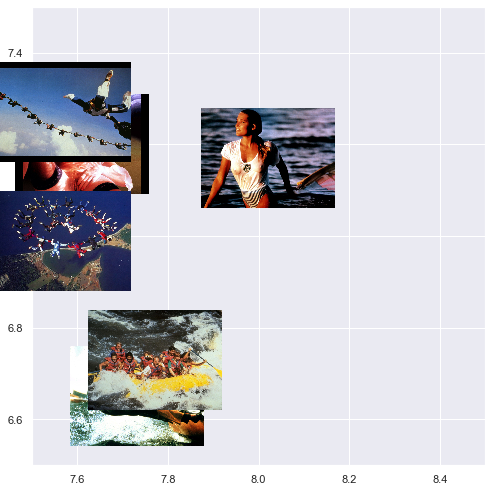

In [21]:
photo_li = temp_df['file'].to_list()
x_li = temp_df['valmn'].to_list()
y_li = temp_df['aromn'].to_list()
ratio = (y_lim[1]-y_lim[0])/(x_lim[1]-x_lim[0])

size = 7
photoPlot(photo_li,x_li,y_li, x_lim, y_lim, plt_size=[size,size*ratio], zoom=.13)

E

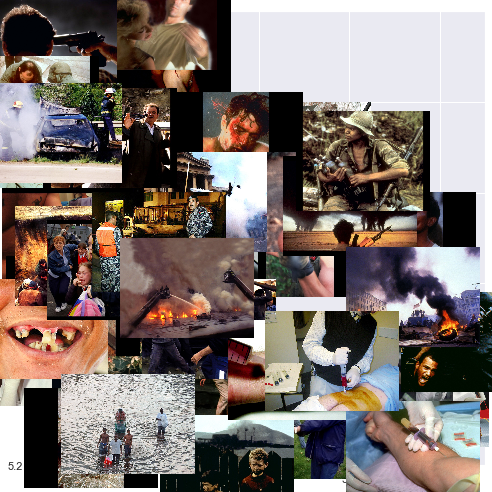

In [22]:
x_lim=[2.5, 3.5]
y_lim=[5.2, 6.2]
temp_df = select_photo(x_lim[0],x_lim[1],y_lim[0],y_lim[1])

photo_li = temp_df['file'].to_list()
x_li = temp_df['valmn'].to_list()
y_li = temp_df['aromn'].to_list()
ratio = (y_lim[1]-y_lim[0])/(x_lim[1]-x_lim[0])

size = 7
photoPlot(photo_li,x_li,y_li, x_lim, y_lim, plt_size=[size,size*ratio], zoom=.13)

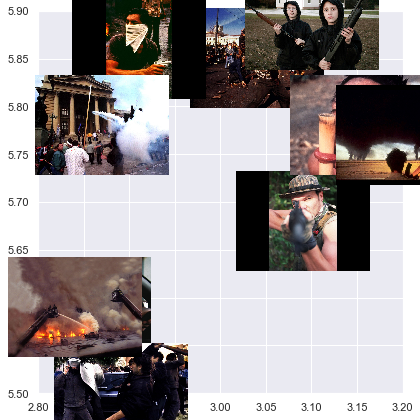

In [23]:
# 보다 중심구역의 사진들만 확인
x_lim=[2.8, 3.2]
y_lim=[5.5, 5.9]
temp_df = select_photo(x_lim[0],x_lim[1],y_lim[0],y_lim[1])

photo_li = temp_df['file'].to_list()
x_li = temp_df['valmn'].to_list()
y_li = temp_df['aromn'].to_list()
ratio = (y_lim[1]-y_lim[0])/(x_lim[1]-x_lim[0])

size = 6
photoPlot(photo_li,x_li,y_li, x_lim, y_lim, plt_size=[size,size*ratio], zoom=.13)

이하생략